In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loan.csv')

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:

df.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
list(df.Gender.unique())

['Male', 'Female', nan]

In [12]:
df[df.duplicated(keep='first')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [13]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [15]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\1389935945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\1389935945.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

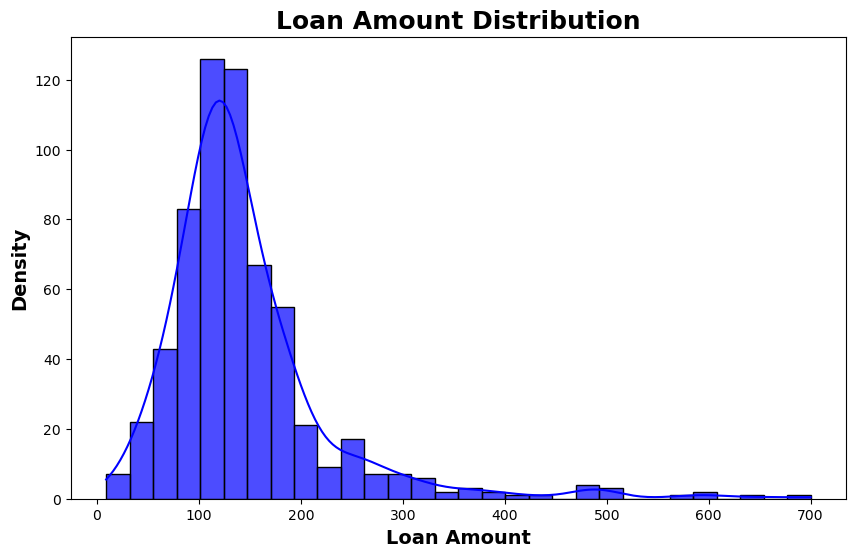

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['LoanAmount'], kde=True, color='blue', bins=30, edgecolor='black', alpha=0.7)
plt.title('Loan Amount Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Loan Amount', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.show()

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\4285252061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


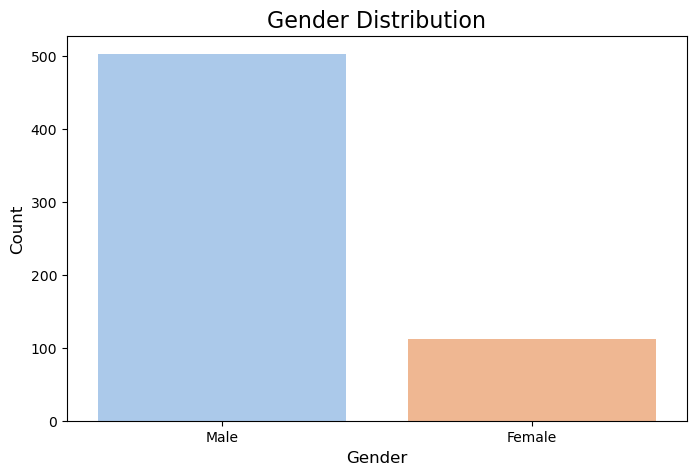

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution', size=16)
plt.xlabel('Gender', size=12)
plt.ylabel('Count', size=12)
plt.show()



C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\2777712630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='coolwarm')


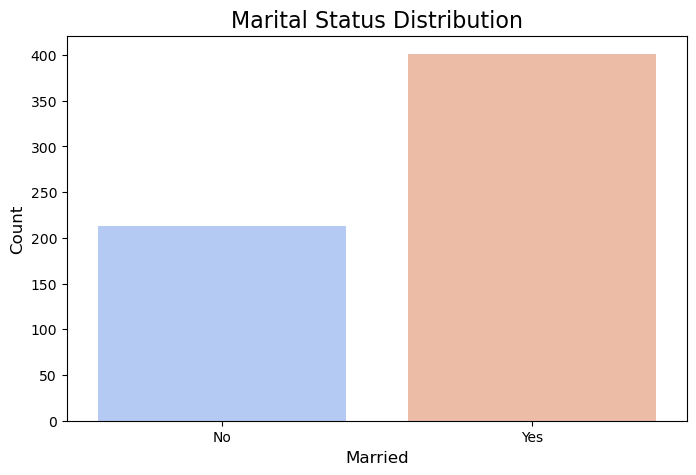

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', data=df, palette='coolwarm')
plt.title('Marital Status Distribution', size=16)
plt.xlabel('Married', size=12)
plt.ylabel('Count', size=12)
plt.show()

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\1508575295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette='viridis')


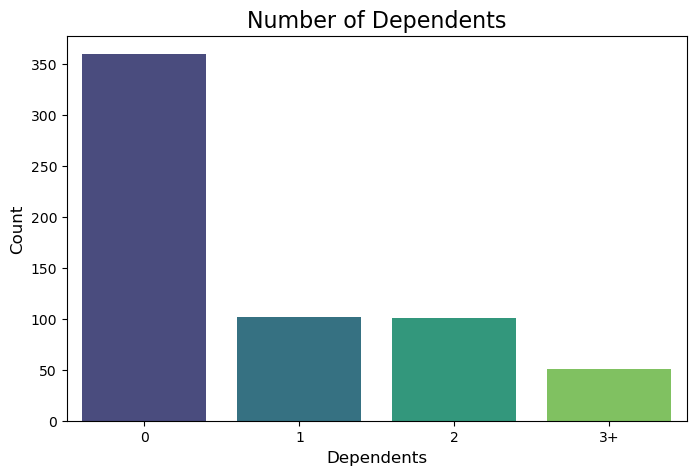

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Dependents', data=df, palette='viridis')
plt.title('Number of Dependents', size=16)
plt.xlabel('Dependents', size=12)
plt.ylabel('Count', size=12)
plt.show()


C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\857629680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Set2')


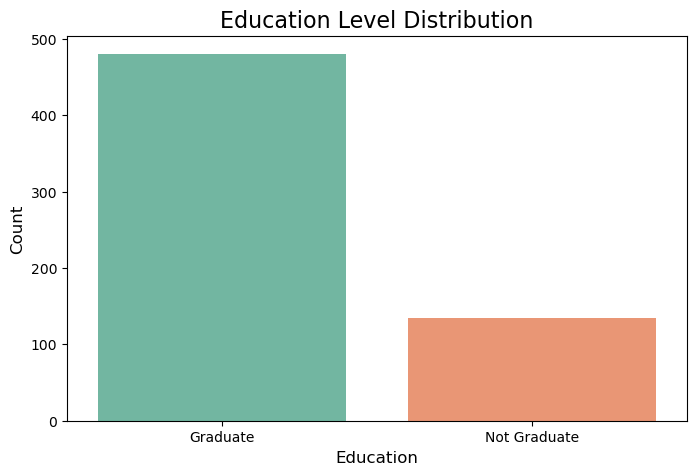

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=df, palette='Set2')
plt.title('Education Level Distribution', size=16)
plt.xlabel('Education', size=12)
plt.ylabel('Count', size=12)
plt.show()

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\4197734151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette='magma')


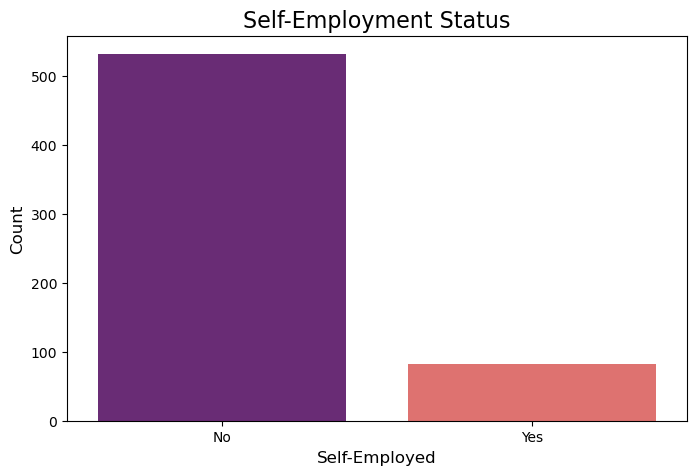

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Self_Employed', data=df, palette='magma')
plt.title('Self-Employment Status', size=16)
plt.xlabel('Self-Employed', size=12)
plt.ylabel('Count', size=12)
plt.show()

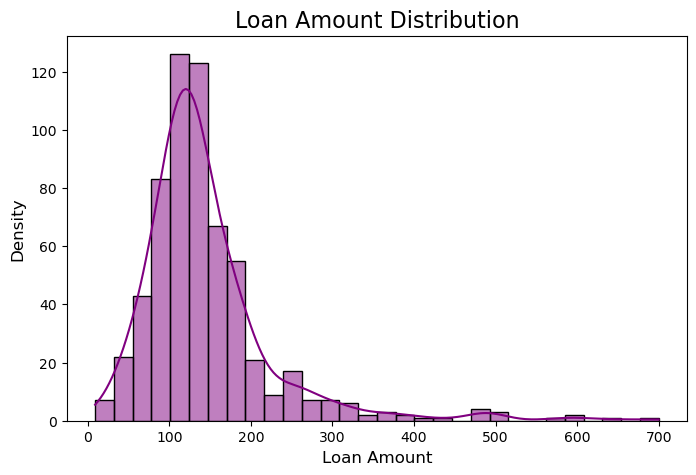

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], kde=True, color='purple', bins=30)
plt.title('Loan Amount Distribution', size=16)
plt.xlabel('Loan Amount', size=12)
plt.ylabel('Density', size=12)
plt.show()

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\3223222068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette='Blues')


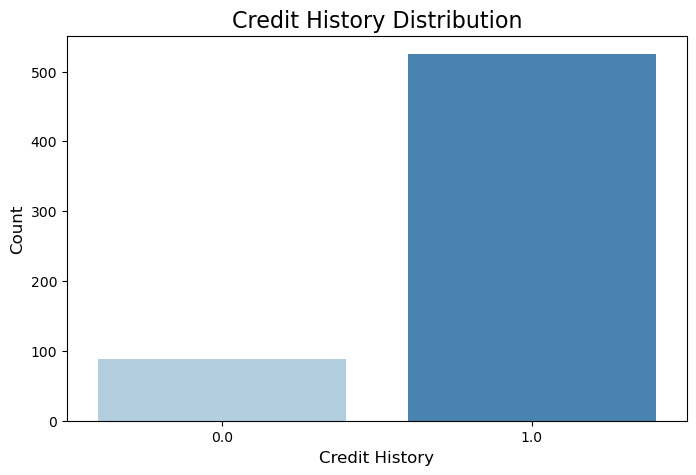

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', data=df, palette='Blues')
plt.title('Credit History Distribution', size=16)
plt.xlabel('Credit History', size=12)
plt.ylabel('Count', size=12)
plt.show()


C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\1006351963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='cool')


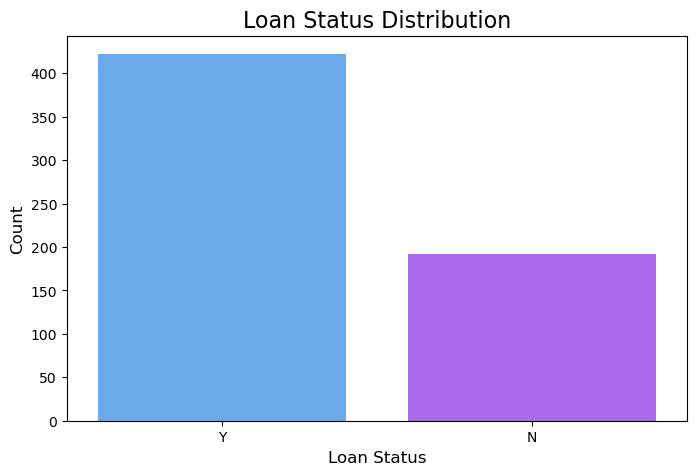

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=df, palette='cool')
plt.title('Loan Status Distribution', size=16)
plt.xlabel('Loan Status', size=12)
plt.ylabel('Count', size=12)
plt.show()

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\410664182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Property_Area', data=df, palette='inferno')


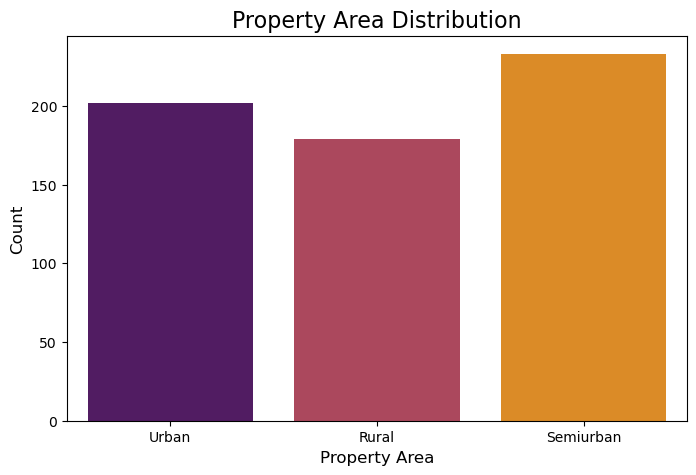

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', data=df, palette='inferno')
plt.title('Property Area Distribution', size=16)
plt.xlabel('Property Area', size=12)
plt.ylabel('Count', size=12)
plt.show()

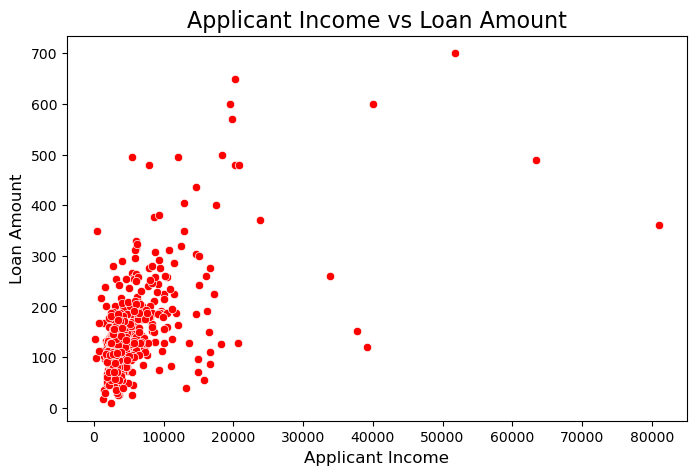

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, color='red')
plt.title('Applicant Income vs Loan Amount', size=16)
plt.xlabel('Applicant Income', size=12)
plt.ylabel('Loan Amount', size=12)
plt.show()

C:\Users\jaydi\AppData\Local\Temp\ipykernel_5504\1381388022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Accent')


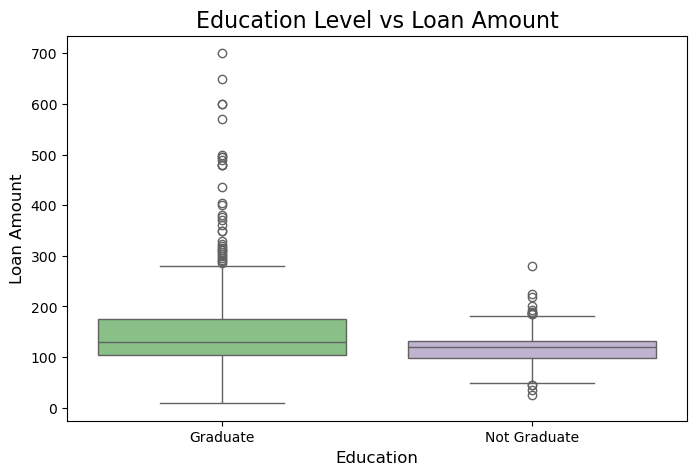

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Accent')
plt.title('Education Level vs Loan Amount', size=16)
plt.xlabel('Education', size=12)
plt.ylabel('Loan Amount', size=12)
plt.show()

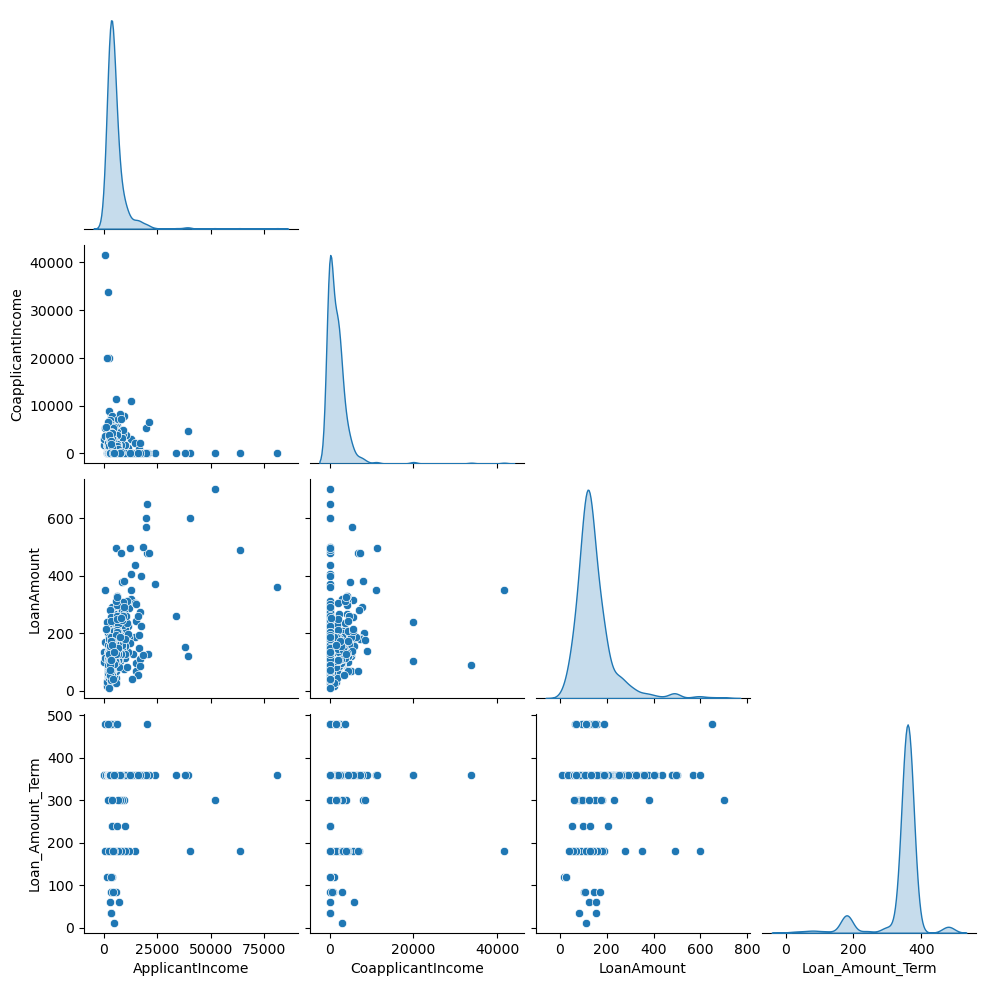

In [30]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']], 
             diag_kind="kde", corner=True)
plt.show()